# <div style="text-align: center"> <h1>Project Title : E-Commerce Customer Churn Prediction</h1></div>

## OBJECTIVE:

### E-commerce customer churn prediction project aims to reduce customer loss and enhance revenue by predicting and retaining at-risk customers. Key steps include data collection, model building, intervention strategies, and continuous monitoring for business impact.

   1) Minimize Churn: Identify and reduce customer churn to maintain a stable customer base.

   2) Enhance Retention: Improve customer retention and loyalty to increase revenue.

   3) Data Analysis: Analyze customer data for insights into churn-related factors.

   4) Predictive Models: Develop machine learning models to forecast potential churn.

   5) Targeted Interventions: Implement personalized strategies to retain at-risk customers.

### Import Important Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import pickle

In [3]:
df=pd.read_csv("churn.csv")
df.head()

,user_id,age,gender,region_category,joining_date,joined_through_referral,preferred_offer_types,internet_option,last_visit_time,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,9f420209e7d129f3,29,F,NaN,2017-04-05,Yes,Without Offers,Wi-Fi,22:29:49,4,1184.49,38604.69,10.0,627.48,Yes,Yes,Yes,No Information Available,Poor Website,1
1,ac6e97806267549e,50,M,NaN,2017-03-31,Yes,Without Offers,Fiber_Optic,15:44:56,11,338.15,7665.66,17.0,575.97,Yes,No,Yes,No Information Available,Poor Customer Service,1
2,a6aa19b1580eed4e,26,F,City,2017-02-11,NaN,Credit/Debit Card Offers,Fiber_Optic,20:31:53,8,235.14,37671.69,5.0,767.93,Yes,No,Yes,No Information Available,Too many ads,0
3,aeee343277211c2f,63,F,Village,2015-12-23,No,Credit/Debit Card Offers,Fiber_Optic,14:28:05,10,56.67,15678.14,11.0,590.22,No,Yes,No,Not Applicable,Too many ads,1
4,82448b5c8ce6390c,64,M,Town,2015-03-20,NaN,Gift Vouchers/Coupons,Wi-Fi,04:16:48,9,153.99,8422.68,0.0,722.04,Yes,No,No,Not Applicable,Poor Product Quality,0


### Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37010 entries, 0 to 37009
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   user_id                       37010 non-null  object 
 1   age                           37010 non-null  int64  
 2   gender                        36951 non-null  object 
 3   region_category               31579 non-null  object 
 4   joining_date                  37010 non-null  object 
 5   joined_through_referral       31568 non-null  object 
 6   preferred_offer_types         36722 non-null  object 
 7   internet_option               37010 non-null  object 
 8   last_visit_time               37010 non-null  object 
 9   days_since_last_login         37010 non-null  int64  
 10  avg_time_spent                37010 non-null  float64
 11  avg_transaction_value         37010 non-null  float64
 12  avg_frequency_login_days      37010 non-null  float64
 13  p

In [5]:
df.describe()

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000,37010.000000
mean,37.120697,-41.943502,279.201356,29272.430216,14.659540,623.590885,0.540881
std,15.866834,228.875324,330.017336,19445.963492,9.478756,270.218956,0.498333
min,10.000000,-999.000000,0.000000,800.460000,0.000000,0.000000,0.000000
25%,23.000000,8.000000,60.122500,14177.835000,7.000000,574.220000,0.000000
50%,37.000000,12.000000,161.770000,27554.485000,14.000000,680.400000,1.000000
75%,51.000000,16.000000,356.525000,40858.672500,22.000000,756.990000,1.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,1.000000


#### Removing Unwanted Columns

In [6]:
df=df.drop(['user_id','joining_date','last_visit_time'],axis=1)

In [7]:
df['churn_risk_score'].value_counts()

churn_risk_score
1    20018
0    16992
Name: count, dtype: int64

#### Data Sample Balancing

In [8]:
df_passed=df[df['churn_risk_score']==1]
df_failed=df[df['churn_risk_score']==0]

df_over=df_failed.sample(18500, replace=True)
df_balanced=pd.concat([df_over,df_passed],axis=0)
df=df_balanced
df['churn_risk_score'].value_counts()

churn_risk_score
1    20018
0    18500
Name: count, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38518 entries, 19414 to 37009
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           38518 non-null  int64  
 1   gender                        38453 non-null  object 
 2   region_category               32864 non-null  object 
 3   joined_through_referral       32871 non-null  object 
 4   preferred_offer_types         38223 non-null  object 
 5   internet_option               38518 non-null  object 
 6   days_since_last_login         38518 non-null  int64  
 7   avg_time_spent                38518 non-null  float64
 8   avg_transaction_value         38518 non-null  float64
 9   avg_frequency_login_days      38518 non-null  float64
 10  points_in_wallet              38518 non-null  float64
 11  used_special_discount         38518 non-null  object 
 12  offer_application_preference  38518 non-null  object 
 13  pa

#### Finding Null Values

In [10]:
df.isna().sum()

age                                0
gender                            65
region_category                 5654
joined_through_referral         5647
preferred_offer_types            295
internet_option                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days           0
points_in_wallet                   0
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

In [11]:
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame
imputer = SimpleImputer(strategy='most_frequent')

# Replace 'categorical_column' with the actual name of your categorical column
df[['gender', 'region_category', 'joined_through_referral', 'preferred_offer_types']] = imputer.fit_transform(df[['gender', 'region_category', 'joined_through_referral', 'preferred_offer_types']])

In [60]:
df.isna().sum()

age                             0
gender                          0
region_category                 0
joined_through_referral         0
preferred_offer_types           0
internet_option                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

#### Label Encoding for Categorical Values

In [62]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df[['feedback','complaint_status','past_complaint','offer_application_preference','used_special_discount','gender','region_category','joined_through_referral','preferred_offer_types','internet_option']]=df[['feedback','complaint_status','past_complaint','offer_application_preference','used_special_discount','gender','region_category','joined_through_referral','preferred_offer_types','internet_option']].apply(encoder.fit_transform)

In [63]:
df.corr()

,age,gender,region_category,joined_through_referral,preferred_offer_types,internet_option,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
age,1.000000,0.001505,0.005674,0.002964,-0.008162,0.011940,-0.002790,0.001159,-0.001355,-0.003142,-0.002265,-0.003816,0.001189,0.002543,0.004160,-0.005897,0.008857
gender,0.001505,1.000000,0.000222,-0.003508,0.001085,-0.004600,-0.004106,-0.009530,0.004325,-0.003510,-0.008472,-0.002837,0.002284,-0.008307,0.000496,-0.001229,-0.005982
region_category,0.005674,0.000222,1.000000,-0.006101,-0.008174,-0.001136,0.000923,0.002574,0.016878,-0.011961,0.016876,0.002033,-0.006484,-0.002412,-0.000575,0.015956,-0.017167
joined_through_referral,0.002964,-0.003508,-0.006101,1.000000,0.003075,-0.006871,-0.010368,0.146093,-0.027864,0.018027,-0.005254,0.022081,0.014501,0.000201,-0.001038,-0.028536,0.027796
preferred_offer_types,-0.008162,0.001085,-0.008174,0.003075,1.000000,0.000897,0.003423,-0.006778,-0.024868,0.007396,-0.008256,0.001398,0.000321,-0.004489,0.000379,-0.025651,0.025606
internet_option,0.011940,-0.004600,-0.001136,-0.006871,0.000897,1.000000,-0.003171,-0.001873,-0.005937,0.001319,0.005786,-0.002957,0.007696,-0.003205,-0.009566,-0.000070,-0.006571
days_since_last_login,-0.002790,-0.004106,0.000923,-0.010368,0.003423,-0.003171,1.000000,0.000887,0.003638,-0.001425,-0.000530,-0.001140,-0.001873,-0.005189,-0.000323,0.008869,-0.006071
avg_time_spent,0.001159,-0.009530,0.002574,0.146093,-0.006778,-0.001873,0.000887,1.000000,0.022991,-0.002638,-0.001404,0.086812,0.079256,0.001864,0.005804,0.016303,-0.012427
avg_transaction_value,-0.001355,0.004325,0.016878,-0.027864,-0.024868,-0.005937,0.003638,0.022991,1.000000,-0.119408,0.056655,0.006651,0.024410,-0.003896,-0.003039,0.215784,-0.217206
avg_frequency_login_days,-0.003142,-0.003510,-0.011961,0.018027,0.007396,0.001319,-0.001425,-0.002638,-0.119408,1.000000,-0.028784,-0.002989,-0.006093,0.006884,0.011086,-0.103287,0.112582


<Axes: >

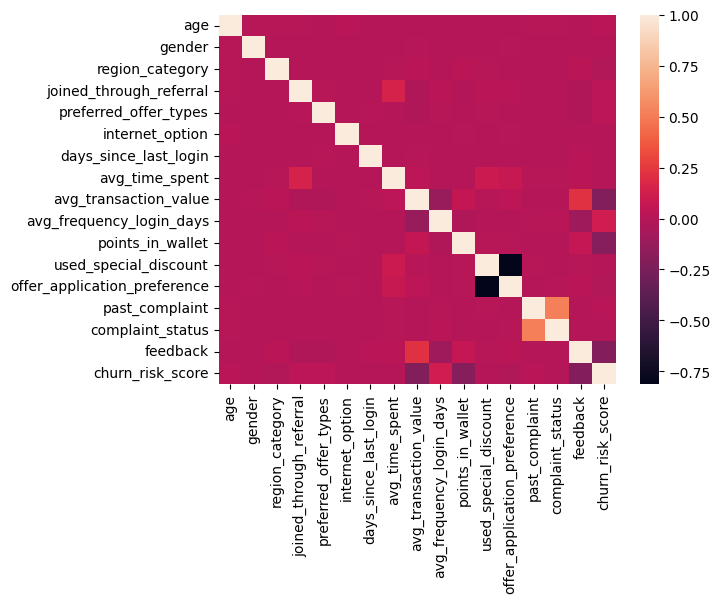

In [82]:
sbn.heatmap(df.corr())

In [64]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(df)
print(df)

with open('minmax_scaler.pkl', 'wb') as file:
    pickle.dump(scaler, file)

       age  gender  region_category  joined_through_referral  \
14334   44       1                0                        1   
29674   53       0                0                        0   
6592    40       1                1                        0   
26215   26       0                1                        0   
7789    47       1                1                        1   
...    ...     ...              ...                      ...   
37004   19       0                1                        1   
37005   36       1                1                        0   
37006   27       0                0                        1   
37007   20       1                1                        1   
37008   38       0                0                        1   

       preferred_offer_types  internet_option  days_since_last_login  \
14334                      1                1                     23   
29674                      1                1                     13   
6592           

In [65]:
corr = df.corr()
corr['churn_risk_score']

age                             0.008857
gender                         -0.005982
region_category                -0.017167
joined_through_referral         0.027796
preferred_offer_types           0.025606
internet_option                -0.006571
days_since_last_login          -0.006071
avg_time_spent                 -0.012427
avg_transaction_value          -0.217206
avg_frequency_login_days        0.112582
points_in_wallet               -0.199880
used_special_discount          -0.010631
offer_application_preference   -0.018711
past_complaint                  0.009058
complaint_status                0.000518
feedback                       -0.207172
churn_risk_score                1.000000
Name: churn_risk_score, dtype: float64

In [66]:
X=df.drop(["churn_risk_score",'days_since_last_login'],axis=1)
Y=df['churn_risk_score']
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35492 entries, 14334 to 37008
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           35492 non-null  int64  
 1   gender                        35492 non-null  int64  
 2   region_category               35492 non-null  int64  
 3   joined_through_referral       35492 non-null  int64  
 4   preferred_offer_types         35492 non-null  int64  
 5   internet_option               35492 non-null  int64  
 6   avg_time_spent                35492 non-null  float64
 7   avg_transaction_value         35492 non-null  float64
 8   avg_frequency_login_days      35492 non-null  float64
 9   points_in_wallet              35492 non-null  float64
 10  used_special_discount         35492 non-null  int64  
 11  offer_application_preference  35492 non-null  int64  
 12  past_complaint                35492 non-null  int64  
 13  co

In [67]:
X

,age,gender,region_category,joined_through_referral,preferred_offer_types,internet_option,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback
14334,44,1,0,1,1,1,456.320000,40778.12,0.000000,584.20,1,1,1,2,3
29674,53,0,0,0,1,1,49.400000,44778.21,12.000000,694.24,1,0,1,3,1
6592,40,1,1,0,0,0,822.450000,32263.75,28.000000,612.81,0,1,0,1,3
26215,26,0,1,0,0,1,99.930000,48208.95,47.748952,557.69,1,0,1,4,2
7789,47,1,1,1,2,0,984.117317,4297.44,24.000000,698.59,0,1,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37004,19,0,1,1,2,0,119.960000,14218.43,7.000000,781.84,1,0,0,1,7
37005,36,1,1,0,0,0,199.330000,29455.29,9.000000,846.52,1,1,0,1,8
37006,27,0,0,1,2,2,368.500000,27038.47,8.000000,835.98,0,1,0,1,6
37007,20,1,1,1,2,1,272.130000,39305.35,27.000000,714.90,1,1,1,2,1


#### Splitting Dataset Into Training & Testing

In [69]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=12345,test_size=0.3)

### Building Model 

In [70]:
def save_model(model, name):
    with open(name, 'wb') as file:
        pickle.dump(model, file)



In [71]:
def build_svm_model():
    from sklearn.svm import SVC
    model = SVC()
    model.fit(x_train, y_train)
    save_model(model, 'svm.pkl')
    return model

In [72]:
def build_lg_model():
    from sklearn.linear_model import LogisticRegressionCV
    model = LogisticRegressionCV()
    model.fit(x_train, y_train)
    save_model(model, 'lg.pkl')
    return model

In [73]:
def build_knn_model():
    from sklearn.neighbors import KNeighborsClassifier
    model = KNeighborsClassifier()
    model.fit(x_train, y_train)
    save_model(model, 'knn.pkl')
    return model

In [74]:
def build_nb_model():
    from sklearn.naive_bayes import GaussianNB
    model = GaussianNB()
    model.fit(x_train, y_train)
    save_model(model, 'nb.pkl')
    return model

In [75]:
def build_dt_model():
    from sklearn.tree import DecisionTreeClassifier
    model = DecisionTreeClassifier()
    model.fit(x_train, y_train)
    save_model(model, 'dt.pkl')
    return model

In [76]:
def build_rf_model():
    from sklearn.ensemble import RandomForestClassifier
    model = RandomForestClassifier()
    model.fit(x_train, y_train)
    save_model(model, 'rf.pkl')
    return model

In [77]:
def build_catboost_model():
    from catboost import CatBoostClassifier
    model = CatBoostClassifier(verbose=False)
    model.fit(x_train, y_train)
    save_model(model, 'cb.pkl')
    return model

In [78]:
def build_xgb_model():
    from xgboost import XGBClassifier
    model = XGBClassifier()
    model.fit(x_train, y_train)
    save_model(model, 'xgb.pkl')
    return model

#### Evaluation Matrics

In [79]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_model_train(model):
    # define y_true and y_pred
    y_true = y_test
    y_pred = model.predict(x_test)
    accuracy = f"{accuracy_score(y_true, y_pred)*100:.2f}%"
    precision = f"{precision_score(y_true, y_pred,average='macro')*100:.2f}%"
    recall = f"{recall_score(y_true, y_pred,average='macro')*100:.2f}%"
    f1 = f"{f1_score(y_true, y_pred,average='macro')*100:.2f}%"
    return accuracy, precision, recall, f1

def evaluate_model_test(model):
    # define y_true and y_pred
    y_true = y_test
    y_pred = model.predict(x_test)
    accuracy = f"{accuracy_score(y_true, y_pred)*100:.2f}%"
    precision = f"{precision_score(y_true, y_pred,average='macro')*100:.2f}%"
    recall = f"{recall_score(y_true, y_pred,average='macro')*100:.2f}%"
    f1 = f"{f1_score(y_true, y_pred,average='macro')*100:.2f}%"
    return accuracy, precision, recall, f1

In [80]:
model_functions = [
    {"name": "SVM", "function": build_svm_model},
    {"name": "LG", "function": build_lg_model},
    {"name": "KNN", "function": build_knn_model},
    {"name": "NB", "function": build_nb_model},
    {"name": "DT", "function": build_dt_model},
    {"name": "RF", "function": build_rf_model},
    {"name": "CatBoost", "function": build_catboost_model},
    {"name": "XGBoost", "function": build_xgb_model}
]
model_evaluation_report = []

# iterate over the list, create model and evaluate the model
for model_info in model_functions:
    model = model_info["function"]()
    metrics_train = evaluate_model_train(model)
    metrics_test = evaluate_model_test(model)
    model_evaluation_report.append({
        "name": model_info["name"],
        "train_accuracy": metrics_train[0],
        "train_precision": metrics_train[1], 
        "train_recall": metrics_train[2],
        "train_f1": metrics_train[3],
        "accuracy": metrics_test[0],
        "precision": metrics_test[1], 
        "recall": metrics_test[2],
        "f1": metrics_test[3]
            
    })

# create a data frame of the result
df_result = pd.DataFrame(model_evaluation_report)
df_result

/home/sunbeam/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sunbeam/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regres

,name,train_accuracy,train_precision,train_recall,train_f1,accuracy,precision,recall,f1
0,SVM,60.17%,78.39%,58.23%,50.35%,60.17%,78.39%,58.23%,50.35%
1,LG,61.84%,61.74%,61.70%,61.71%,61.84%,61.74%,61.70%,61.71%
2,KNN,77.09%,77.11%,76.94%,76.99%,77.09%,77.11%,76.94%,76.99%
3,NB,63.26%,63.97%,62.54%,61.96%,63.26%,63.97%,62.54%,61.96%
4,DT,83.14%,83.11%,83.11%,83.11%,83.14%,83.11%,83.11%,83.11%
5,RF,86.38%,86.48%,86.25%,86.32%,86.38%,86.48%,86.25%,86.32%
6,CatBoost,86.60%,86.83%,86.41%,86.51%,86.60%,86.83%,86.41%,86.51%
7,XGBoost,86.21%,86.45%,86.02%,86.12%,86.21%,86.45%,86.02%,86.12%


## DATA VISUALIZATION USING TABLEAU

### [Tableau Dashboard](https://public.tableau.com/app/profile/gulshan.gedam/viz/ProjectWorkinProgess/Dashboard3?publish=yes)

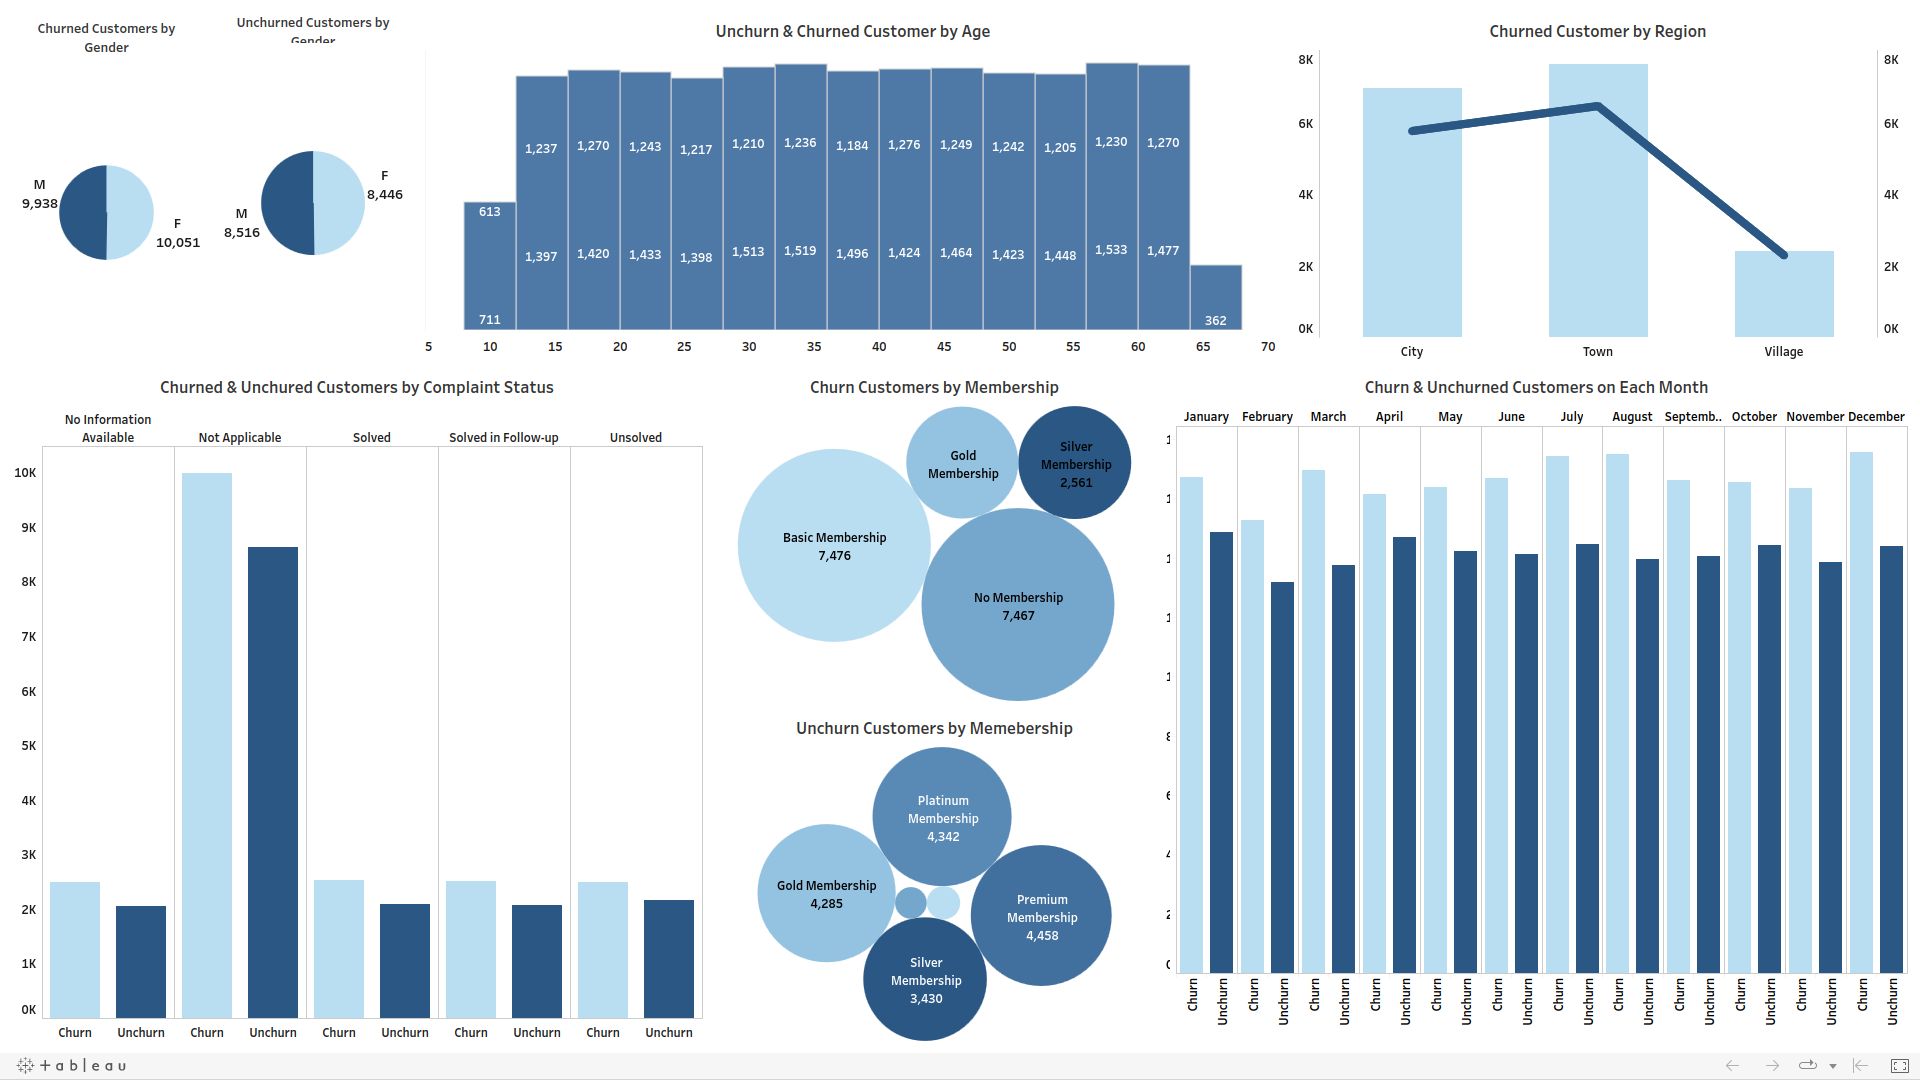